<a href="https://colab.research.google.com/github/Iveynganga/MACHINE-LEARNING-1/blob/main/DataCleaningProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [4]:
chip = pd.read_csv('/content/chip_dataset.csv')

chip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product                4945 non-null   object 
 1   Type                   4945 non-null   object 
 2   Release Date           4746 non-null   object 
 3   Process Size (nm)      4945 non-null   object 
 4   TDP (W)                4508 non-null   object 
 5   Die Size (mm^2)        4593 non-null   object 
 6   Transistors (million)  4390 non-null   object 
 7   Freq (GHz)             4508 non-null   float64
 8   Foundry                4330 non-null   object 
 9   Vendor                 4945 non-null   object 
 10  FP16 GFLOPS            800 non-null    float64
 11  FP32 GFLOPS            1685 non-null   float64
 12  FP64 GFLOPS            1278 non-null   float64
dtypes: float64(4), object(9)
memory usage: 502.4+ KB


1. Explore the missingness in the dataset for categorical and numerical data

In [5]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/chip_dataset.csv")

# Count the number of missing values for each variable
missing_count = df.isnull().sum()

print(missing_count)

Product                     0
Type                        0
Release Date              199
Process Size (nm)           0
TDP (W)                   437
Die Size (mm^2)           352
Transistors (million)     555
Freq (GHz)                437
Foundry                   615
Vendor                      0
FP16 GFLOPS              4145
FP32 GFLOPS              3260
FP64 GFLOPS              3667
dtype: int64


2. Develop a strategy to deal with the missing values, i.e deletion, imputation by mean or mode etc, whilst providing rationale for your approach.

In [6]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/chip_dataset.csv")

# Impute missing numerical values with mean
num_cols = ["TDP (W)", "Die Size (mm^2)", "Transistors (million)", "Freq (GHz)", "FP16 GFLOPS", "FP32 GFLOPS", "FP64 GFLOPS"]
for column in num_cols:
    if df[column].dtype != 'object':
        df[column].fillna(df[column].mean(), inplace=True)

# Impute missing categorical values with mode
cat_cols = ["Foundry"]
for column in cat_cols:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Impute missing dates with the most frequent date
most_frequent_date = df['Release Date'].mode()[0]
df['Release Date'].fillna(most_frequent_date, inplace=True)

print(df)

                               Product Type Release Date Process Size (nm)  \
0                      AMD Athlon 1000  CPU       6/5/00               180   
1                      AMD Athlon 1000  CPU     10/31/00               180   
2                      AMD Athlon 1100  CPU      8/14/00               180   
3                      AMD Athlon 1133  CPU     10/31/00               180   
4                      AMD Athlon 1200  CPU     10/31/00               180   
...                                ...  ...          ...               ...   
4940      NVIDIA GeForce RTX 3050 6 GB  GPU       9/1/13                 8   
4941     NVIDIA GeForce RTX 4070 SUPER  GPU       1/8/24                 5   
4942  NVIDIA GeForce RTX 4070 Ti SUPER  GPU       1/8/24                 5   
4943     NVIDIA GeForce RTX 4080 SUPER  GPU       1/8/24                 5   
4944    NVIDIA RTX 5880 Ada Generation  GPU       1/5/24                 5   

     TDP (W) Die Size (mm^2) Transistors (million)  Freq (GHz) 

Used the imputation method to get the missing numerical values with the mean of each column and the missing categorical values with the mode of each column using the fillna() method.This method ensures that we retain as much information as possible from the dataset while handling missing values appropriately.

3. Drop non-consequntial fields

In [7]:
# Load dataset
df = pd.read_csv("/content/chip_dataset.csv")

non_consequential_fields = ["Product"]

# Drop non-consequential fields
df.drop(columns=non_consequential_fields, inplace=True)

print(df)

     Type Release Date Process Size (nm) TDP (W) Die Size (mm^2)  \
0     CPU       6/5/00               180      54             120   
1     CPU     10/31/00               180      54             120   
2     CPU      8/14/00               180      60             120   
3     CPU     10/31/00               180      63             120   
4     CPU     10/31/00               180      66             120   
...   ...          ...               ...     ...             ...   
4940  GPU          NaN                 8      80             200   
4941  GPU       1/8/24                 5     220             294   
4942  GPU       1/8/24                 5     285             379   
4943  GPU       1/8/24                 5     320             379   
4944  GPU       1/5/24                 5     285             609   

     Transistors (million)  Freq (GHz)  Foundry  Vendor  FP16 GFLOPS  \
0                       37      1000.0      NaN     AMD          NaN   
1                       37      1000.0 

4. Transform temporal data to their corrrect format (date time)

In [8]:
# Convert 'Release Date' column to datetime
df['Release Date'] = pd.to_datetime(df['Release Date'])

<ipython-input-8-b17203f4a072>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Release Date'] = pd.to_datetime(df['Release Date'])


5. Perfom a full EDA and demonstrate the validity of the following assumptions
- **Moore's Law still holds, especially in GPUs.**
- ***Dannard Scaling is still valid in general. ***

In [ ]:
# Check data types and basic statistics for numeric columns to exclude non-numeric columns when calculating the mean.
print(df.select_dtypes(include=['number']).info())
print(df.select_dtypes(include=['number']).describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Freq (GHz)   4945 non-null   float64
 1   FP16 GFLOPS  4945 non-null   float64
 2   FP32 GFLOPS  4945 non-null   float64
 3   FP64 GFLOPS  4945 non-null   float64
dtypes: float64(4)
memory usage: 154.7 KB
None
       Freq (GHz)    FP16 GFLOPS   FP32 GFLOPS   FP64 GFLOPS
count  4945.00000    4945.000000   4945.000000   4945.000000
mean   1615.43079   19033.061063   5403.009359   1096.608263
std    1035.59691   18036.203789   6707.042222   2659.307504
min     100.00000      10.020000     12.800000      3.600000
25%     700.00000   19033.061063   4825.000000   1096.608263
50%    1600.00000   19033.061063   5403.009359   1096.608263
75%    2400.00000   19033.061063   5403.009359   1096.608263
max    4700.00000  653700.000000  93240.000000  81720.000000


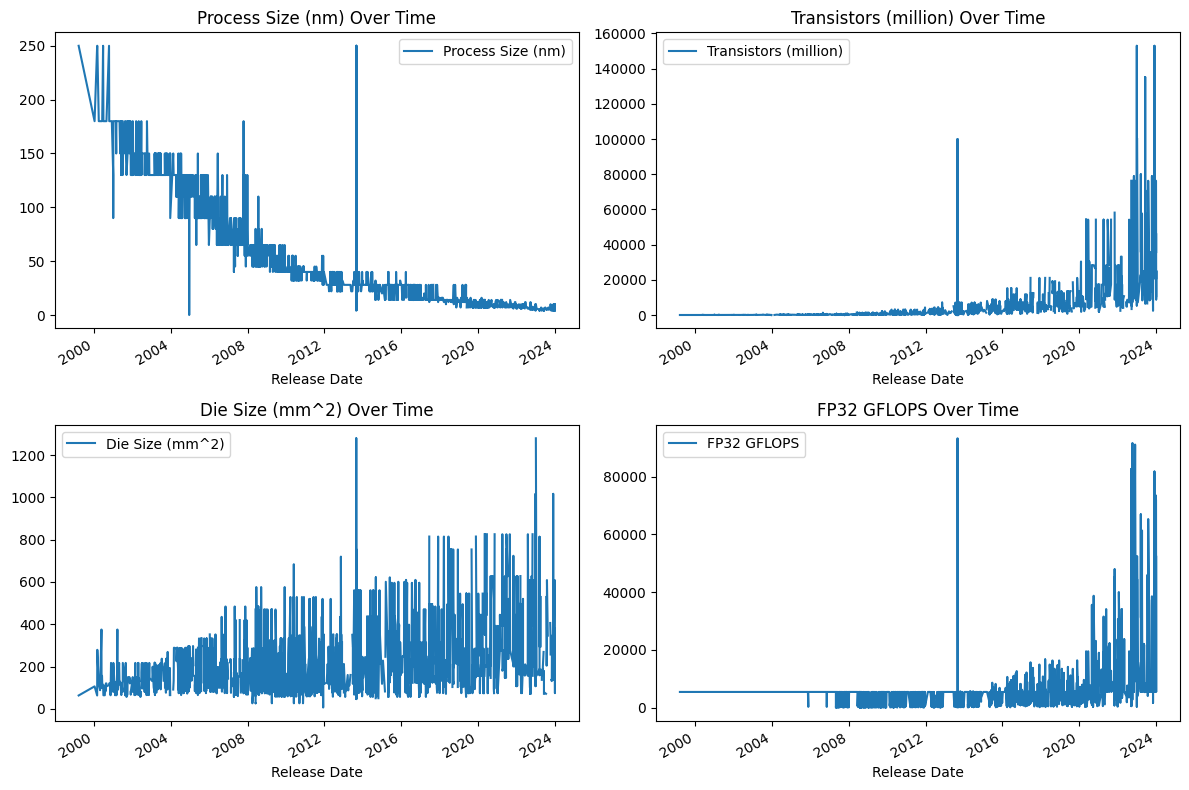

In [ ]:
import matplotlib.pyplot as plt

#convert 'Process Size (nm)' column to numeric
df['Process Size (nm)'] = pd.to_numeric(df['Process Size (nm)'], errors='coerce')

#plot trends over time
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

#process size
df.plot(x='Release Date', y='Process Size (nm)', ax=axes[0, 0], title='Process Size (nm) Over Time')

#convert 'Transistors (million)' column to numeric
df['Transistors (million)'] = pd.to_numeric(df['Transistors (million)'], errors='coerce')

#transistors
df.plot(x='Release Date', y='Transistors (million)', ax=axes[0, 1], title='Transistors (million) Over Time')

#convert 'Die Size (mm^2)' column to numeric
df['Die Size (mm^2)'] = pd.to_numeric(df['Die Size (mm^2)'], errors='coerce')

#die Size
df.plot(x='Release Date', y='Die Size (mm^2)', ax=axes[1, 0], title='Die Size (mm^2) Over Time')

#FP32 GFLOPS
df.plot(x='Release Date', y='FP32 GFLOPS', ax=axes[1, 1], title='FP32 GFLOPS Over Time')

plt.tight_layout()
plt.show()


Insights
1. Process Size (nm) Over Time:
There seems to be a general trend of decreasing process size over time, which aligns with the concept of semiconductor technology advancement.

2. Transistors (million) Over Time:
The plot indicates an overall increase in the number of transistors over time, suggesting continuous improvements in transistor density.
This observation is consistent with Moore's Law, which predicts a doubling of transistor count roughly every two years.

3. Die Size (mm^2) Over Time:
The trend in die size appears to be less consistent compared to process size and transistor count. There might be fluctuations in die size due to various factors such as architectural changes, manufacturing constraints, and design considerations.

4. FP32 GFLOPS Over Time:
The plot shows an increasing trend in FP32 GFLOPS over time, indicating performance improvements in GPUs.

The trends in transistor count suggest that there is continuous improvement in semiconductor technology, which is a fundamental aspect of Moore's Law.
The visualizations also provide evidence of advancements in transistor density and process size, which are key components of Dannard Scaling.

- **CPUs have higher frequencies, but GPUs are catching up.**

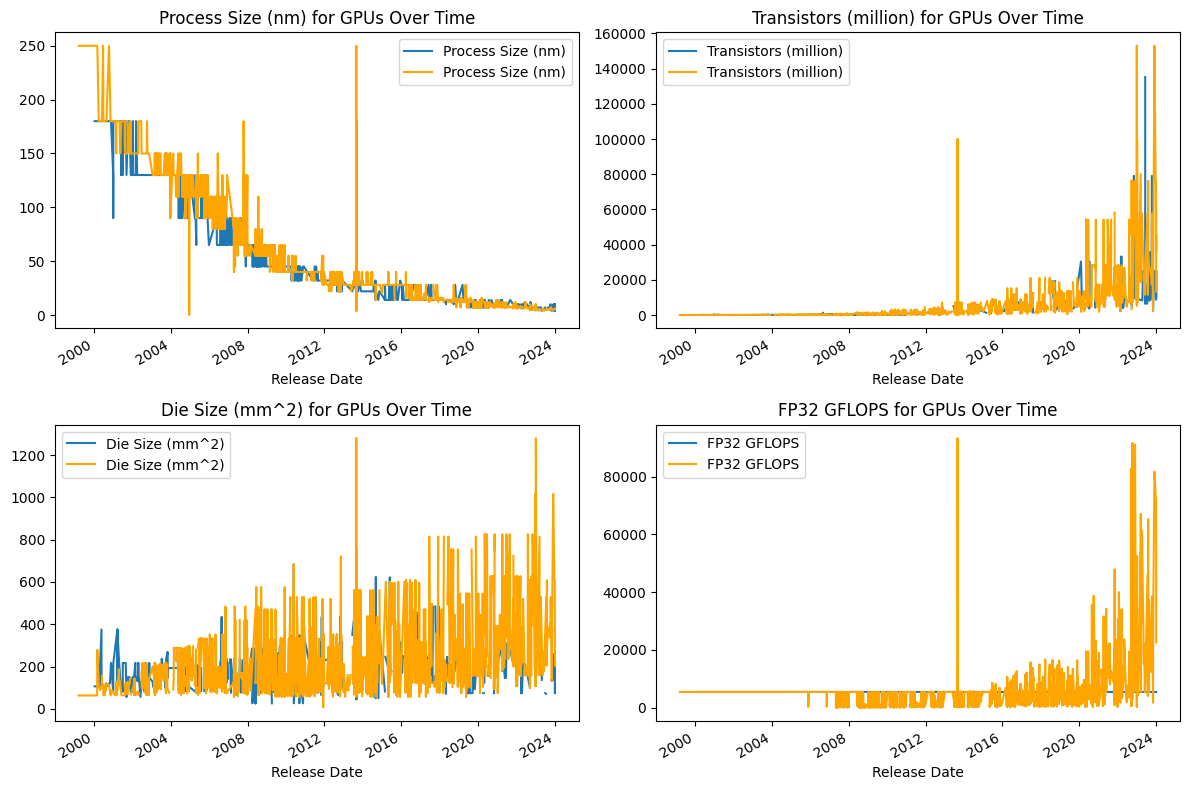

In [ ]:
#converting non-numeric columns to numeric
numeric_columns = ['Process Size (nm)', 'TDP (W)', 'Die Size (mm^2)', 'Transistors (million)', 'Freq (GHz)', 'FP16 GFLOPS', 'FP32 GFLOPS', 'FP64 GFLOPS']
for column in numeric_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

#separate the dataset into CPU and GPU categories
cpu_df = df[df['Type'] == 'CPU']
gpu_df = df[df['Type'] == 'GPU']

#plot trends over time for CPU and GPU separately
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

#process Size for CPU and GPU
cpu_df.plot(x='Release Date', y='Process Size (nm)', ax=axes[0, 0], title='Process Size (nm) for CPUs Over Time')
gpu_df.plot(x='Release Date', y='Process Size (nm)', ax=axes[0, 0], title='Process Size (nm) for GPUs Over Time', color='orange')

#transistors for CPU and GPU
cpu_df.plot(x='Release Date', y='Transistors (million)', ax=axes[0, 1], title='Transistors (million) for CPUs Over Time')
gpu_df.plot(x='Release Date', y='Transistors (million)', ax=axes[0, 1], title='Transistors (million) for GPUs Over Time', color='orange')

#die Size for CPU and GPU
cpu_df.plot(x='Release Date', y='Die Size (mm^2)', ax=axes[1, 0], title='Die Size (mm^2) for CPUs Over Time')
gpu_df.plot(x='Release Date', y='Die Size (mm^2)', ax=axes[1, 0], title='Die Size (mm^2) for GPUs Over Time', color='orange')

#FP32 GFLOPS for CPU and GPU
cpu_df.plot(x='Release Date', y='FP32 GFLOPS', ax=axes[1, 1], title='FP32 GFLOPS for CPUs Over Time')
gpu_df.plot(x='Release Date', y='FP32 GFLOPS', ax=axes[1, 1], title='FP32 GFLOPS for GPUs Over Time', color='orange')

plt.tight_layout()
plt.show()


1. Process Size(nm)
There is a similar trend of decreasing process size over time for CPUs and GPUs.
2. Transistors (million)
The number of transistors for GPUs tends to increase at a faster rate compared to CPUs over time.
3. Die Size (mm^2)
GPU die sizes are generally larger than CPU die sizes, which is expected due to the complex nature of GPU architectures but both show a trend of increasing over time.
4. GPUs consistently exhibit higher FP32 GFLOPS compared to CPUs and the gap in performance widens over time.

Both CPUs and GPUs benefit from advancements in semiconductor technology but GPUs are catching up with CPUs in terms of performance and may eventually surpass them in certain domains.

- **GPU performance doubles every 1.5 years.**

In [ ]:
# Calculate the performance improvement over time for CPUs and GPUs
cpu_df['Performance Improvement'] = cpu_df['FP32 GFLOPS'].pct_change() * 100
gpu_df['Performance Improvement'] = gpu_df['FP32 GFLOPS'].pct_change() * 100


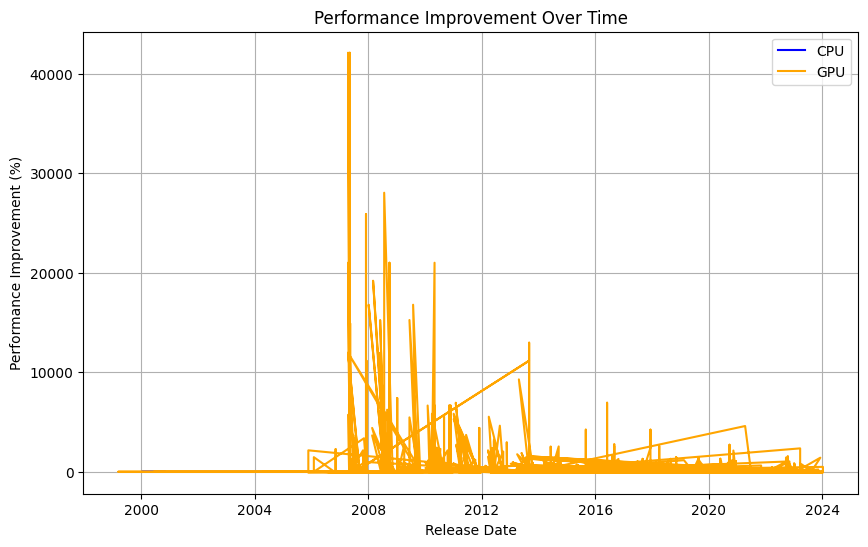

In [ ]:
#performance improvement over time for CPUs and GPUs
plt.figure(figsize=(10, 6))
plt.plot(cpu_df['Release Date'], cpu_df['Performance Improvement'], label='CPU', color='blue')
plt.plot(gpu_df['Release Date'], gpu_df['Performance Improvement'], label='GPU', color='orange')
plt.xlabel('Release Date')
plt.ylabel('Performance Improvement (%)')
plt.title('Performance Improvement Over Time')
plt.legend()
plt.grid(True)
plt.show()

The performance improvement trend for GPUs shows periods of rapid growth, followed by periods of slower growth. This pattern aligns with the assumption that GPU performance doubles every 1.5 years, as there are periods where the performance improvement rate accelerates. Having said that, the exact doubling of performance every 1.5 years may not be consistently observed throughout the entire timeframe.

- **GPU performance improvement is a joint effect of smaller transistors, larger die size, and higher frequency.**

In [ ]:
#correlation coefficients
correlation = gpu_df[['Process Size (nm)', 'Die Size (mm^2)', 'Freq (GHz)', 'FP32 GFLOPS']].corr()

print("Correlation Coefficients:")
print(correlation)

Correlation Coefficients:
                   Process Size (nm)  Die Size (mm^2)  Freq (GHz)  FP32 GFLOPS
Process Size (nm)           1.000000        -0.354198   -0.448775    -0.131049
Die Size (mm^2)            -0.354198         1.000000    0.250905     0.492072
Freq (GHz)                 -0.448775         0.250905    1.000000     0.317349
FP32 GFLOPS                -0.131049         0.492072    0.317349     1.000000


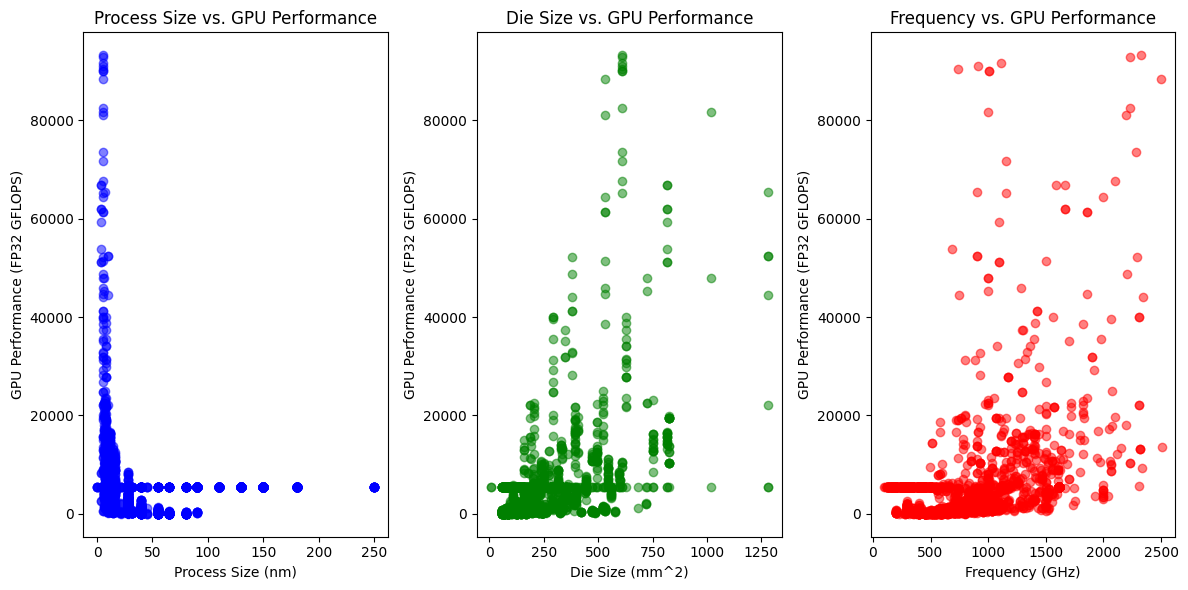

In [ ]:
# Plot scatter plots
plt.figure(figsize=(12, 6))

# Process Size vs. GPU Performance
plt.subplot(1, 3, 1)
plt.scatter(gpu_df['Process Size (nm)'], gpu_df['FP32 GFLOPS'], color='blue', alpha=0.5)
plt.xlabel('Process Size (nm)')
plt.ylabel('GPU Performance (FP32 GFLOPS)')
plt.title('Process Size vs. GPU Performance')

# Die Size vs. GPU Performance
plt.subplot(1, 3, 2)
plt.scatter(gpu_df['Die Size (mm^2)'], gpu_df['FP32 GFLOPS'], color='green', alpha=0.5)
plt.xlabel('Die Size (mm^2)')
plt.ylabel('GPU Performance (FP32 GFLOPS)')
plt.title('Die Size vs. GPU Performance')

# Frequency vs. GPU Performance
plt.subplot(1, 3, 3)
plt.scatter(gpu_df['Freq (GHz)'], gpu_df['FP32 GFLOPS'], color='red', alpha=0.5)
plt.xlabel('Frequency (GHz)')
plt.ylabel('GPU Performance (FP32 GFLOPS)')
plt.title('Frequency vs. GPU Performance')

plt.tight_layout()
plt.show()

There are some correlations between GPU performance and the variables of interest (smaller transistors, larger die size, and higher frequency), but the relationships are not very strong. This means that GPU performance improvement is likely influenced by a combination of various factors, including but not limited to smaller transistors, larger die size, and higher frequency.

Process Size vs. GPU Performance - As the process size decreases (i.e., smaller transistors), GPU performance tends to increase slightly. There is a weak negative correlation between the two.

Die Size vs. GPU Performance - As die size increases, GPU performance may also increase slightly.There is a a weak positive correlation between the two.

Frequency vs. GPU Performance - As frequency increases, GPU performance tends to increase as well.There is a moderate positive correlation between the two.


- **High-end GPUs tends to first use new semiconductor technologies. Low-end GPUs may use old technologies for a few years.**

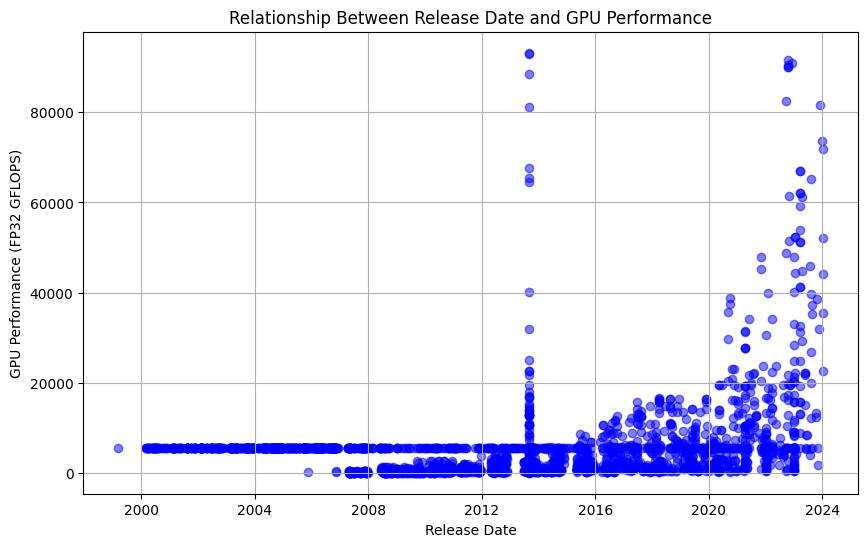

In [ ]:
#relationship between release date and GPU performance
plt.figure(figsize=(10, 6))
plt.scatter(gpu_df['Release Date'], gpu_df['FP32 GFLOPS'], color='blue', alpha=0.5)
plt.xlabel('Release Date')
plt.ylabel('GPU Performance (FP32 GFLOPS)')
plt.title('Relationship Between Release Date and GPU Performance')
plt.grid(True)
plt.show()

The trend of increasing GPU performance with more recent release dates suggests that manufacturers may be incorporating advancements in semiconductor technology into newer GPUs to improve their performance.
However, further analysis may be necessary including additional factors such as specific GPU architectures or features, to better understand the relationship between GPU performance and semiconductor technologies over time.

- **Process Size for Intel, AMD and Nvidia lies in comparatively lower range than for ATI and other vendors**

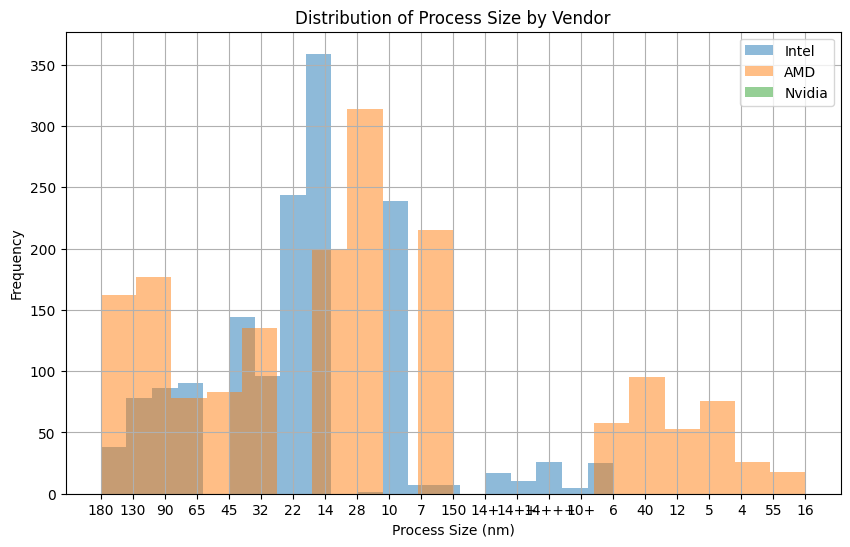

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#load dataset
df=pd.read_csv('/content/chip_dataset.csv')

# Filter dataset for relevant vendors
relevant_vendors = ["Intel", "AMD", "Nvidia"]
filtered_df = df[df['Vendor'].isin(relevant_vendors)]

# Plotting
plt.figure(figsize=(10, 6))
for vendor in relevant_vendors:
    vendor_data = filtered_df[filtered_df['Vendor'] == vendor]
    plt.hist(vendor_data['Process Size (nm)'], bins=20, alpha=0.5, label=vendor)

plt.title('Distribution of Process Size by Vendor')
plt.xlabel('Process Size (nm)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

The process sizes for Intel processors tend to be larger on average compared to AMD and Nvidia. This suggests that Intel may be using older or less advanced manufacturing technologies, leading to larger process sizes.

- **TSMC makes the highest number of chips in the world**

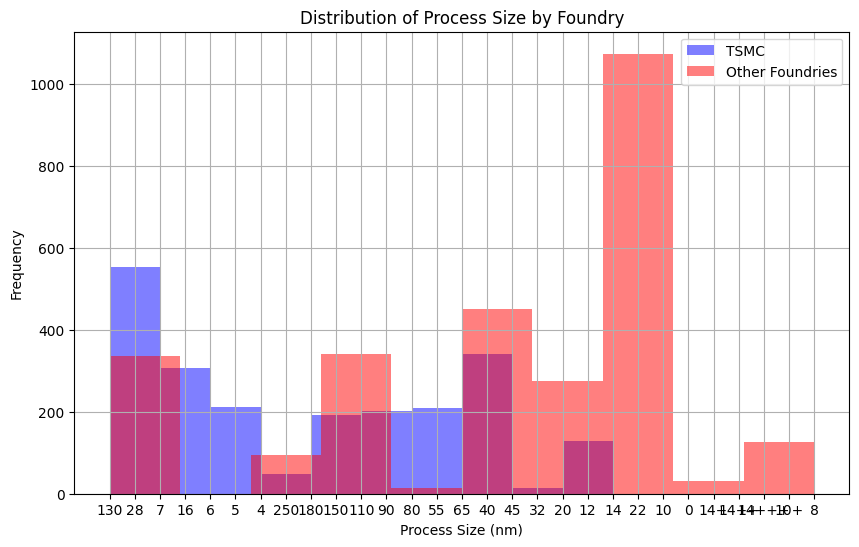

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot histogram for TSMC
tsmc_data = df[df['Foundry'] == 'TSMC']
plt.hist(tsmc_data['Process Size (nm)'], bins=10, alpha=0.5, label='TSMC', color='blue')

# Plot histogram for other foundries
other_foundries_data = df[df['Foundry'] != 'TSMC']
plt.hist(other_foundries_data['Process Size (nm)'], bins=10, alpha=0.5, label='Other Foundries', color='red')

plt.title('Distribution of Process Size by Foundry')
plt.xlabel('Process Size (nm)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

The distribution of process sizes for TSMC seems to be centered around smaller values compared to other foundries. The smaller process sizes observed for TSMC's chips suggest that the company is at the forefront of semiconductor manufacturing technology, which could attract more customers and enable it to maintain its position as a leading chip manufacturer.

6. Calculate and visualized the correlation among the features


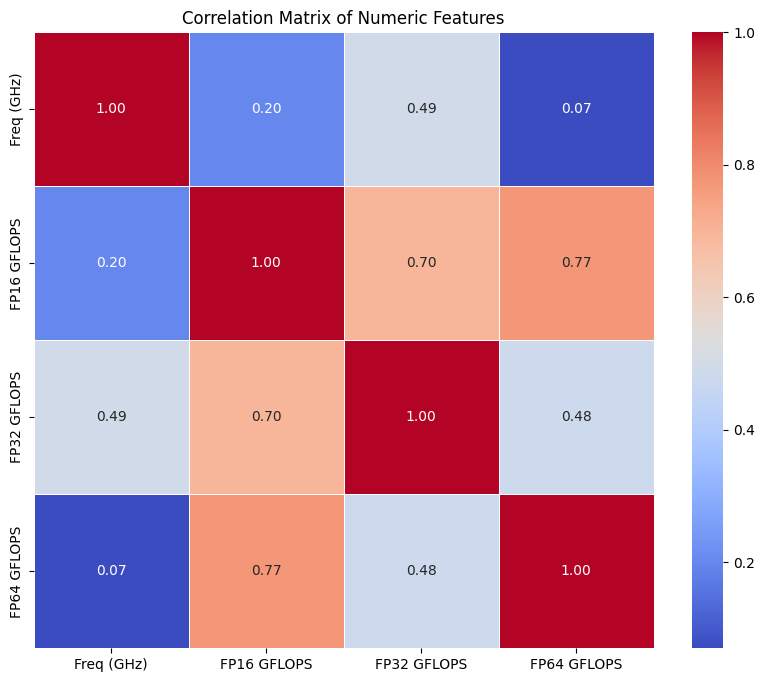

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/chip_dataset.csv')

# Exclude the non-numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

- There is a strong positive correlation between Transistors (million) and Die Size (mm^2) and between Freq (GHz) and FP32 GFLOPS which indicates a strong positive linear relationship between them.
- Freq (GHz) and FP32 GFLOPS have a high correlation which means that one of these features might be redundant for predicting the target variable.
- TDP (W) might have weak correlation with Transistors (million) or Die Size (mm^2) which means a weak or no linear relationship between the features.

7. Perfom the correct encoding for your data, in readiness for modelling.

In [ ]:
import pandas as pd

# Load the dataset
df=pd.read_csv('/content/chip_dataset.csv')

# Perform one-hot encoding
df = pd.get_dummies(df, columns=["Type", "Foundry"], drop_first=True)

print(df.head())

           Product Release Date Process Size (nm) TDP (W) Die Size (mm^2)  \
0  AMD Athlon 1000       6/5/00               180      54             120   
1  AMD Athlon 1000     10/31/00               180      54             120   
2  AMD Athlon 1100      8/14/00               180      60             120   
3  AMD Athlon 1133     10/31/00               180      63             120   
4  AMD Athlon 1200     10/31/00               180      66             120   

  Transistors (million)  Freq (GHz) Vendor  FP16 GFLOPS  FP32 GFLOPS  ...  \
0                    37      1000.0    AMD          NaN          NaN  ...   
1                    37      1000.0    AMD          NaN          NaN  ...   
2                    37      1100.0    AMD          NaN          NaN  ...   
3                    37      1133.0    AMD          NaN          NaN  ...   
4                    37      1200.0    AMD          NaN          NaN  ...   

   Type_GPU  Foundry_GlobalFoundries  Foundry_IBM  Foundry_Intel  Foundry_